## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
#Business Understanding

Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which airraft cUnderstanding the Context Understanding the factors leading to aviation accidents is crucial for developing safety strategies. 
Analyzing historical accident data can help identify patterns and risk factors, leading to improved safety protocols and preventive measures. 
    our code here - remember to use markdown cells for comments as well!

In [ ]:
#Dataset Overview
Summary: The dataset contains records of aircraft crashes between 1948 - 2022. The data from 1948 -1982 is limited so we drop those data points to focus on the majority of the volume following 1982. Data points include the number of engines, seveirty of passenger injuries, severity of aircraft damage,and more.

Important Data Columns:

Aircraft Make and Model: Information about the specific make and model of the aircraft involved in each incident.

Aircraft Damage: The severity of the damage to the aircraft

Severity of Injuries: A count for each incident on the number of uninjured, minor, serious, and fatal injuries.

Engine Type: The type of engine on the aircraft

Num of Engines: The number of engines on an airplane. The mean is 1 but can range from 1 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('data/Aviation_Data.csv',index_col=0,encoding='latin1',low_memory =False)
df.head()

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.describe()


In [ ]:
df.columns


In [ ]:
df.dtypes

In [ ]:
df.keys

In [ ]:
# finding the misssing data
df.isna().sum()

In [ ]:
#finding percentage
df.isna().sum()/len(df)*100

In [59]:
#data dropped below the 30% and the others being left

columns_to_drop=[]
for x in df:
    if (df[x].isna().sum() / len(df[x]))*100>30:
        columns_to_drop.append(x)
print(columns_to_drop)

['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Aircraft.Category', 'FAR.Description', 'Schedule', 'Air.carrier', 'Broad.phase.of.flight']


In [60]:
df['Total.Fatal.Injuries'].fillna(df['Total.Fatal.Injuries'].median(),inplace =True)
df['Total.Minor.Injuries'].fillna(df['Total.Minor.Injuries'].median(),inplace =True)
df['Total.Serious.Injuries'].fillna(df['Total.Serious.Injuries'].median(),inplace =True)
df['Total.Uninjured'].fillna(df['Total.Uninjured'].median(),inplace =True)


In [61]:
unique_values = df['Registration.Number'].unique()
print(unique_values)

['NC6404' 'N5069P' 'N5142R' ... 'N749PJ' 'N210CU' 'N9026P']


In [62]:
df.isna().sum()

Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number           0
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: int64

In [63]:
df['Registration.Number'] = df['Registration.Number'].fillna(0)

In [64]:
df['Registration.Number']

Event.Id
20001218X45444    NC6404
20001218X45447    N5069P
20061025X01555    N5142R
20001218X45448    N1168J
20041105X01764     N15NY
                   ...  
20221227106491    N1867H
20221227106494    N2895Z
20221227106497    N749PJ
20221227106498    N210CU
20221230106513    N9026P
Name: Registration.Number, Length: 90348, dtype: object

In [65]:
 #finding different plane make
df['Make'].value_counts()


Make
cessna           27149
piper            14870
beech             5372
boeing            2745
bell              2722
                 ...  
cohen                1
kitchens             1
lutes                1
izatt                1
royse ralph l        1
Name: count, Length: 7587, dtype: int64

In [66]:
#cleaning the weather conditions column
df['Weather.Condition'] = df['Weather.Condition'].str.title()
df['Weather.Condition'].value_counts()

Weather.Condition
Vmc    77303
Imc     5976
Unk     1118
Name: count, dtype: int64

In [67]:
df['Make'] = df['Make'].str.title()
df['Make'].value_counts()

Make
Cessna           27149
Piper            14870
Beech             5372
Boeing            2745
Bell              2722
                 ...  
Cohen                1
Kitchens             1
Lutes                1
Izatt                1
Royse Ralph L        1
Name: count, Length: 7587, dtype: int64

In [68]:
#finding different plane models and damage
df[['Model','Aircraft.damage']].value_counts()

Model      Aircraft.damage
152        Substantial        1958
172        Substantial        1514
172N       Substantial         910
PA-28-140  Substantial         699
150        Substantial         682
                              ... 
EC130 B4   Destroyed             1
           Substantial           1
EC135      Destroyed             1
EC135 P1   Substantial           1
unknown    Destroyed             1
Name: count, Length: 15353, dtype: int64

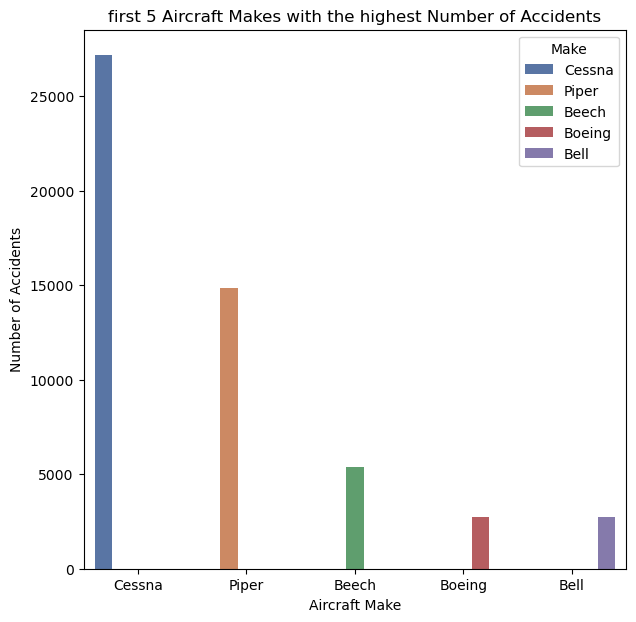

In [69]:
accident_counts = df.groupby('Make').size().reset_index(name='accident_count')
df['Make'] = df['Make'].str.lower()
# Sorting counts 
top_10_accidents = accident_counts.sort_values(by='accident_count', ascending=False).head(5)
# Ploting 
plt.figure(figsize=(7, 7))
sns.barplot(x='Make', y='accident_count', data=top_10_accidents, palette='deep',hue="Make")
plt.title('first 5 Aircraft Makes with the highest Number of Accidents')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
plt.show()

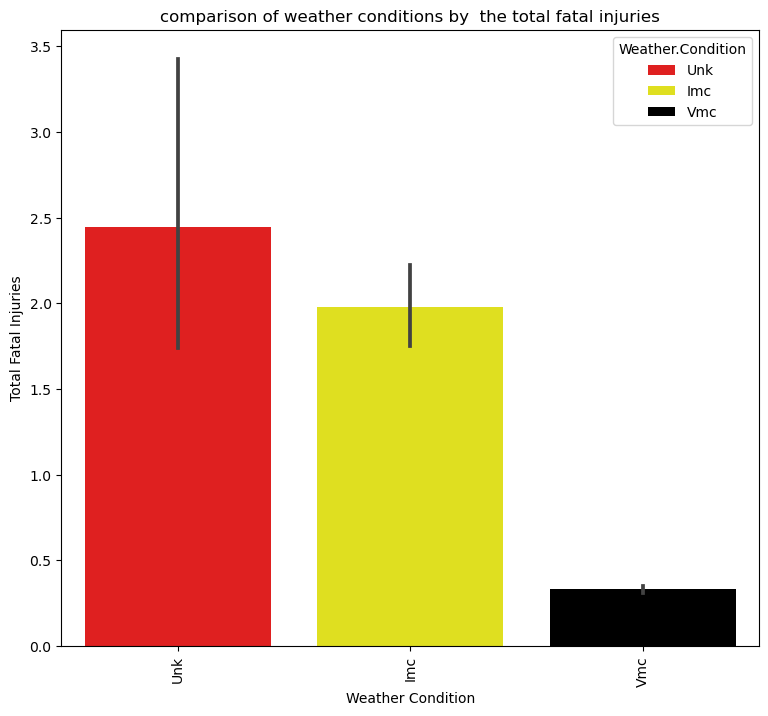

In [70]:
#other visualisation
colors = ['red', 'yellow', 'black']
plt.figure(figsize=(9, 8))
sns.barplot(x='Weather.Condition', y='Total.Fatal.Injuries', data=df, palette=colors, hue='Weather.Condition', dodge=False)
plt.title('comparison of weather conditions by  the total fatal injuries')
plt.xlabel('Weather Condition')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=90)

plt.show()


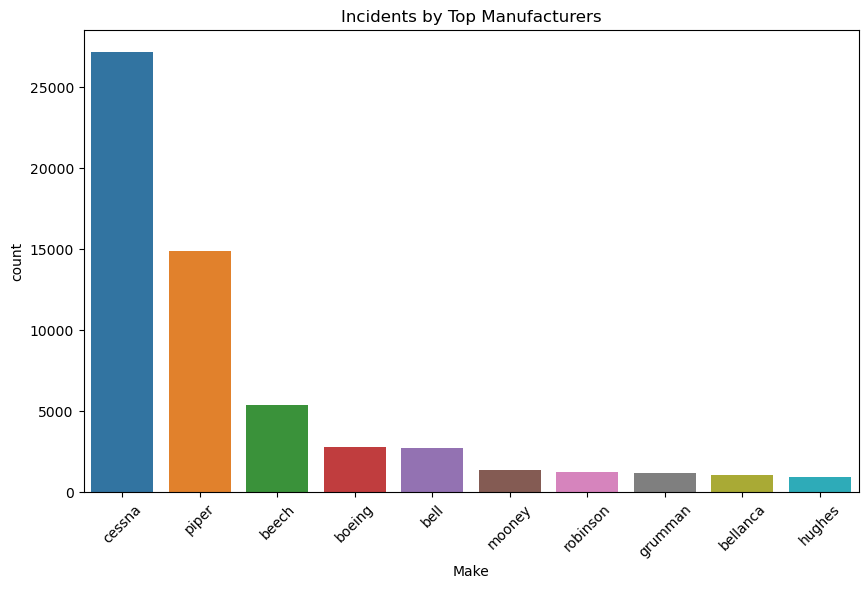

In [71]:
# Bar plot of incidents by top manufacturers
plt.figure(figsize=(10,6))
sns.countplot(x='Make', data=df, order=df['Make'].value_counts().iloc[:10].index)
plt.xticks(rotation=45)
plt.title('Incidents by Top Manufacturers')
plt.show()

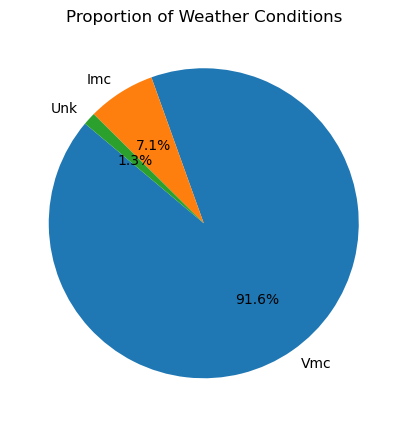

In [72]:
# Pie chart of weather conditions
weather_counts = df['Weather.Condition'].value_counts()
plt.figure(figsize=(5,6))
plt.pie(weather_counts, labels=weather_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Weather Conditions')
plt.show()

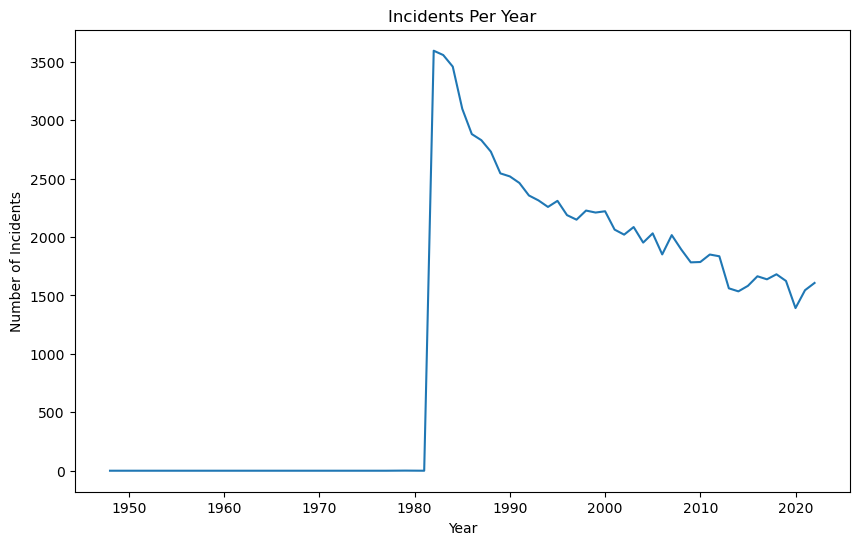

In [73]:
# Line plot for number of incidents over time
df['year'] = pd.to_datetime(df['Event.Date'], errors='coerce').dt.year
incidents_per_year = df.groupby('year').size()

plt.figure(figsize=(10,6))
plt.plot(incidents_per_year)
plt.title('Incidents Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()